In [12]:
import numpy as np


def sigmoid(x):
    return 1.0/(1+np.exp(-x))

class LSTM():
    def __init__(self,X_t,n_neurons):
        self.T         = max(X_t.shape) # no of inputs 
        self.X_t       = X_t
        self.n_neurons=n_neurons
        
        # Inital predictiona al many values
        self.Y_hat     = np.zeros((self.T, 1))
        
        
        # Forget Gate
        
        self.bf = np.random.randn(n_neurons,1)
        self.Wf = np.random.randn(n_neurons,n_neurons+1)
        
        # Input Gate
        
        self.Wi = np.random.randn(n_neurons,n_neurons+1)
        self.bi = np.random.randn(n_neurons,1)


        self.Wc = np.random.randn(n_neurons,n_neurons+1)
        self.bc = np.random.randn(n_neurons,1)

        # Output gate

        self.Wo = np.random.randn(n_neurons,n_neurons+1)
        self.bo = np.random.randn(n_neurons,1)

        # initital hidden and cell state
        
        self.h_t_1 = np.zeros((n_neurons,1))
        self.c_t_1 = np.zeros((n_neurons,1))
        
        self.H         = [np.zeros((self.n_neurons,1)) for t in range(self.T+1)]
        
        
    def forward(self,x_t,h_t_1,c_t_1):
        xf = np.concatenate([h_t_1,x_t],axis=0)
        
        # How much amount to forget
        
        ft = sigmoid(np.dot(self.Wf,xf) + self.bf)
        
        # Input
        
            # Information 
        it = sigmoid(np.dot(self.Wi,xf)+self.bi)
            # How much info to add
        c_hat_t = np.tanh( np.dot(self.Wc,xf)+self.bc)
        
        C_t = ft*c_t_1 + it *c_hat_t
        
        # Output gate
        # This output will be based on our cell state, 
        # but will be a filtered version
        ot = sigmoid(np.dot(self.Wo,xf)+self.bo) # 
        ht = ot*np.tanh(C_t)
        
        return ht,C_t

In [13]:
import matplotlib.pyplot as plt

In [14]:
X_t = np.arange(-10,10,0.1)
X_t = X_t.reshape(len(X_t),1)
Y_t = np.sin(X_t) + 0.1*np.random.randn(len(X_t),1)

In [15]:
n_neurons = 500

lstm =LSTM(X_t,n_neurons)

In [16]:
Y_hat = lstm.Y_hat
H = lstm.H
T = lstm.T
ht = H[0] # at time 0 , cause of this we are create H to be of length 'T +1' meaning 1 more then no of Data

In [20]:
c_t = np.zeros((n_neurons,1))

In [27]:
for t,xt in enumerate(X_t):
    xt= xt.reshape(1,1)
    [ht,c_t]=lstm.forward(xt,ht,c_t)
    
    H[t+1]=ht # at time 1 
    Y_hat[t] = ht[0]
     

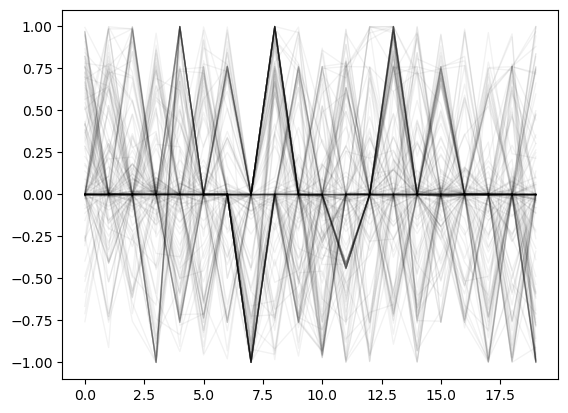

In [26]:
for h in H:
    plt.plot(np.arange(20),h[:20],'k-',linewidth=1,alpha=0.05)